In [ ]:
from nltk import sent_tokenize
import nltk
import torch
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brighttenkorangofori/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
def load_model(device):

    pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",device=device)

    return pipe

In [6]:
theme_classifier = load_model(device)



/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
theme_classifier(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938650727272034, 0.003273810725659132, 0.0028610399458557367]}

In [8]:
from glob import glob

In [9]:
import os

#os.path.dir()

files = glob('/Users/brighttenkorangofori/Desktop/naruto/data/subtitles/*')
files.sort()
files[0]


'/Users/brighttenkorangofori/Desktop/naruto/data/subtitles/Naruto Season 1 - 01.ass'

In [34]:
#subs grouped into each episode 
import pandas as pd
file_path = '/Users/brighttenkorangofori/Desktop/naruto/data/subtitles'
files = glob(f'{file_path}/*')
files.sort()
subs = []
for file in files:
        with open(file,'r') as file:
                lines = file.readlines()
                lines = lines[27:]
                
                        
                lines = [(line.split(',,')[-1]).strip() for line in lines]
                lines = ' '.join(lines)
                subs.append(lines)
print(len(subs))


220


In [32]:
len(subs) 

660

In [46]:

def load_subtitles(file_path):
        file_path = '/Users/brighttenkorangofori/Desktop/naruto/data/subtitles'
        files = glob(f'{file_path}/*')
        files.sort()
        subs = []
        for file in files:
                with open(file,'r') as file:
                        lines = file.readlines()
                        lines = lines[27:]
                        
                                
                        lines = [(line.split(',,')[-1]).strip() for line in lines]
                        lines = ' '.join(lines)
                        subs.append(lines)
        
        
        #season = int(file.split('Season')[-1][:7].split('-')[0])
        #episode = int(file.split('Season')[-1][:7].split('-')[1])
        seasons = [int(file.split('Season')[-1][:7].split('-')[0]) for file in files]
        episodes = [int(file.split('Season')[-1][:7].split('-')[1]) for file in files]
        print(len(seasons),len(episodes),len(subs))
        data = {'subtitles': subs,
                'seasons' :seasons,
                'episodes' : episodes,
                }
        return pd.DataFrame(data)

        

In [47]:
file_path = '/Users/brighttenkorangofori/Desktop/naruto/data/subtitles'
df = load_subtitles(file_path)

220 220 220


In [48]:
df.head(5)

,subtitles,seasons,episodes
0,"A long time ago, a powerful demon fox\Nappeare...",1,1
1,"C'mon! Running like a fugitive, Being chased b...",1,2
2,"C'mon! Running like a fugitive, Being chased b...",1,3
3,"C'mon! Running like a fugitive, Being chased b...",1,4
4,"C'mon! Running like a fugitive, Being chased b...",1,5


In [104]:
def get_theme(subs):
    labels = ['self-development','battle','hope','friendship','love','betrayal','sacrifice']
    scripts = ' '.join(subs)
    
    #individual sentences
    sentence_tokens = sent_tokenize(scripts)
    
    #clean text
    sentence_tokens = [token.replace('\\N',' ') for token in sentence_tokens]
   

    #divide into batchs 
    batches = []
    for i in range(0,len(sentence_tokens)-1,20):
            batch = sentence_tokens[i : (i+20)]
            batches.append(batch)

    #merge each 20 sentences in big strings
    batches = [' '.join(batch) for batch in batches]

    classes = theme_classifier(batches[:3],labels)

    return classes

In [107]:
first_3_class =get_theme(df.subtitles)

/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x15b603d00> was reported to be 3 (when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x15b603d00> was reported to be 3 (when accessing len(dataloader)), but 5 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x15b603d00> was reported to be 3 (when accessing len(dataloader)), but 6 s

In [165]:
first_3_class[1]

{'sequence': 'He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last graduation test and the one before that. This is no time to be goofing off, you fool! We will have a re-test on the Transformation Jutsu! Even those who already passed will take it! Whaaaat?! Sakura Haruno. Here I go… Transform! OK! I did it! Cha! Did you see that, Sasuke? Next, Sasuke Uchiha. Yes.',
 'labels': ['self-development',
  'battle',
  'sacrifice',
  'betrayal',
  'hope',
  'friendship',
  'love'],
 'scores': [0.3394635021686554,
  0.1941613107919693,
  0.16267549991607666,
  0.13113020360469818,
  0.06922612339258194,
  0.06852379441261292,
  0.03481961786746979]}

In [180]:
import numpy as np
def plot_themes(classes):
     c = {'sequence' : [],
          'labels' : [],
          'scores' : []}
     for clas in classes:
          for k,v in clas.items():
               c[k].append(v)

     df = pd.DataFrame(c)

     max_scores = []
     classification = []



     for score, label in zip(df['scores'], df['labels']):
          max_score = np.max(score)
          max_scores.append(max_score)
          index = score.index(max_score)
          name = label[index]
          classification.append(name)
     df['max_scores'] = max_scores
     df['classification'] = classification
      
     sns.barplot(data = df, x ='classification',y ='max_scores' ,hue = 'classification' )

     return df

     
          





In [181]:
df3 = plot_themes(first_3_class)

In [2]:
import nltk
nltk.download('punkt_tab')

from nltk import sent_tokenize

sent_tokenize('hey haow are you')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/brighttenkorangofori/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['hey haow are you']

<Axes: xlabel='classification', ylabel='max_scores'>

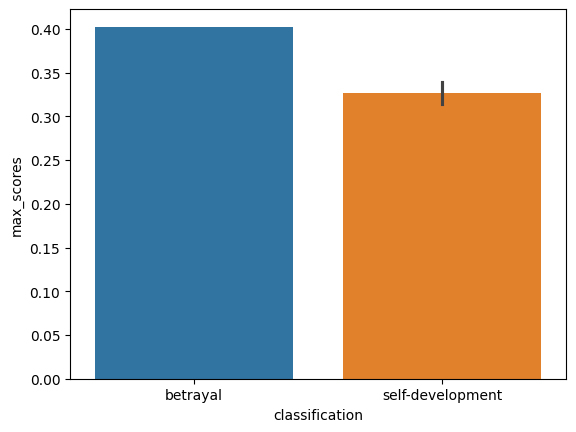

In [185]:
import seaborn as sns


In [2]:
import nltk

# Add the path where the punkt data is located
nltk.data.path.append('/Users/brighttenkorangofori/nltk_data')

# Verify the path
print(nltk.data.path)

['/Users/brighttenkorangofori/nltk_data', '/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/nltk_data', '/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/share/nltk_data', '/Users/brighttenkorangofori/Desktop/naruto/naurto-venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/Users/brighttenkorangofori/nltk_data']
